In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

# Load the data

In [2]:
data=pd.read_csv('3.01. Country clusters.csv')

In [3]:
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


# Plot Data

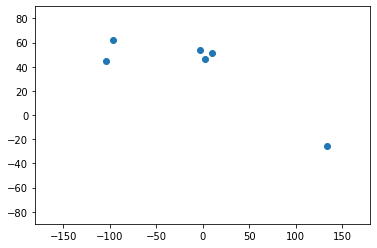

In [6]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Select the features

In [7]:
x=data.iloc[:,1:3]
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


# Clustering

In [21]:
kmeans=KMeans(3)

In [22]:
kmeans.fit(x)

KMeans(n_clusters=3)

# Clustering Results

In [23]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 2, 2, 2, 1])

In [24]:
data_with_clusters=data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,2
3,UK,54.01,-2.53,English,2
4,Germany,51.15,10.40,German,2
5,Australia,-25.45,133.11,English,1


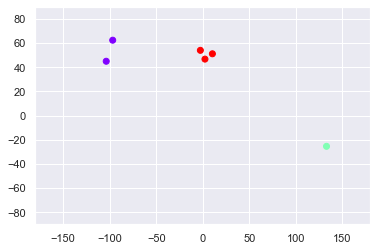

In [25]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# Map the Data

In [26]:
data_mapped=data.copy()
data_mapped['Language']=data_mapped['Language'].map({'English':0,'French':1,'German':2})
data_mapped

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,0
1,Canada,62.40,-96.80,0
2,France,46.75,2.40,1
3,UK,54.01,-2.53,0
4,Germany,51.15,10.40,2
5,Australia,-25.45,133.11,0


# Select the features

In [33]:
x=data_mapped.iloc[:,1:4]
x

,Latitude,Longitude,Language
0,44.97,-103.77,0
1,62.40,-96.80,0
2,46.75,2.40,1
3,54.01,-2.53,0
4,51.15,10.40,2
5,-25.45,133.11,0


# Clustering

In [34]:
kmeans=KMeans(3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [35]:
identified_clusters=kmeans.fit_predict(x)
identified_clusters

array([0, 0, 1, 1, 1, 2])

In [36]:
data_with_clusters=data.copy()
data_with_clusters['Clusters']=identified_clusters
data_with_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,1
3,UK,54.01,-2.53,English,1
4,Germany,51.15,10.40,German,1
5,Australia,-25.45,133.11,English,2


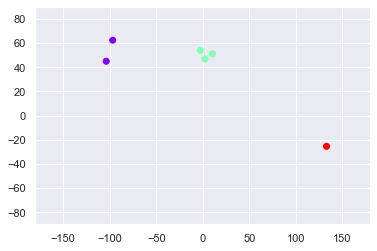

In [37]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

# WCSS

In [38]:
kmeans.inertia_

290.10523333333333

In [41]:
wcss=[]
for i in range(1,7):
    kmeans=KMeans(i)
    kmeans.fit(x)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)

In [42]:
wcss

[42605.41356666667,
 13208.958119999996,
 290.10523333333333,
 113.91233333333332,
 39.00624999999998,
 0.0]

# The Elbow Method

Text(0, 0.5, 'Within-cluster Sum of Squares')

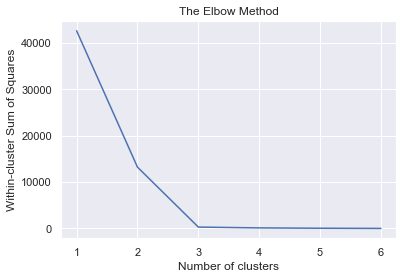

In [43]:
number_cluster=range(1,7)
plt.plot(number_cluster,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')